In [26]:
import sys
assert sys.version_info >= (3, 7)

In [27]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

In [28]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rcParams['font.sans-serif'] = 'Consolas'

In [29]:
import numpy as np
np.random.seed(39)

In [30]:
import pandas as pd

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lifesat = pd.read_csv('data/lifesat.csv')
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values
gdp = 'GDP per capita (USD)'
ls = 'Life satisfaction'

In [33]:
type(lifesat['GDP per capita (USD)']), type(lifesat[['GDP per capita (USD)']]), type(lifesat[['GDP per capita (USD)']].values)

(pandas.core.series.Series, pandas.core.frame.DataFrame, numpy.ndarray)

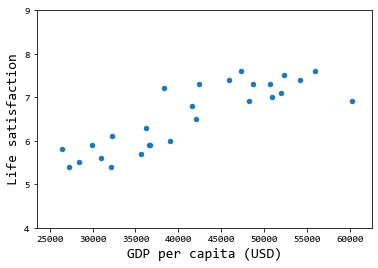

[[6.30165767]]


In [34]:
lifesat.plot(kind='scatter', grid=False, x=gdp, y=ls)
plt.axis([23_500, 62_500, 4, 9])
plt.show()

model = LinearRegression()
model.fit(X, y)
X_new = [[37_655.2]]
print(model.predict(X_new))

Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two lines:

In [35]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
print(model.predict(X_new))

[[6.33333333]]


Generating the data and figures

In [36]:
import os
IMAGES_PATH = os.getcwd() + '\\img\\codes\\'
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH + f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

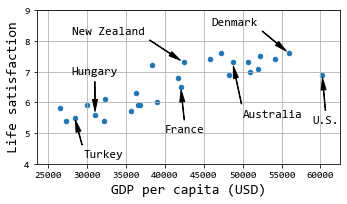

In [37]:
lifesat = pd.read_csv('data/lifesat.csv', index_col='Country')
lifesat.plot(kind='scatter', figsize=(5, 3), grid=True, x=gdp, y=ls)
min_life_sat = 4
max_life_sat = 9
min_gdp = 23_500
max_gdp = 62_500
position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = lifesat[gdp].loc[country]
    pos_data_y = lifesat[ls].loc[country]
    country = 'U.S.' if country == 'United States' else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), 
                 xytext=pos_text, 
                 arrowprops=dict(facecolor='black', width=.5,shrink=.08, headwidth=5))
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
save_fig('money_happy_scatterplot')
plt.show()

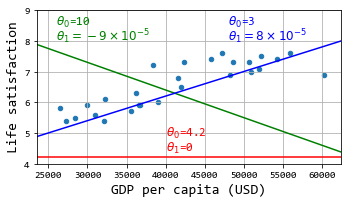

In [38]:
lifesat.plot(kind='scatter', figsize=(5, 3), grid=True, x=gdp, y=ls)
X = np.linspace(min_gdp, max_gdp, 1000)
w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, 'r')
plt.text(40_000, 4.9, fr"$\theta_0$={w1}", color='red')
plt.text(40_000, 4.4, fr"$\theta_1$={w2}", color='red')

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, 'g')
plt.text(26_000, 8.5, fr"$\theta_0$={w1}", color='g')
plt.text(26_000, 8.0, fr"$\theta_1={w2} \times 10^{{-5}}$", color='g')

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, 'b')
plt.text(48_000, 8.5, fr"$\theta_0$={w1}", color='b')
plt.text(48_000, 8.0, fr"$\theta_1={w2} \times 10^{{-5}}$", color='b')

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('tweaking_model_params_plot')

plt.show()

In [43]:
from sklearn import linear_model
X_samples = lifesat[[gdp]].values
y_samples = lifesat[[ls]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_samples, y_samples)
w0, w1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f'w0: {w0:.2f}, w1: {w1:.2e}')

w0: 3.75, w1: 6.78e-05


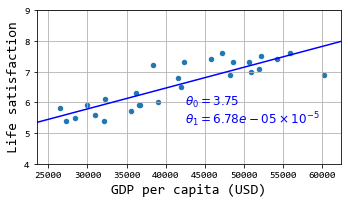

In [50]:
lifesat.plot(kind='scatter', figsize=(5, 3), grid=True, x=gdp, y=ls)
X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, w0 + w1 * X, 'b')

plt.text(max_gdp - 20_000, min_life_sat + 1.9, fr'$\theta_0 = {w0:.2f}$', color='b')
plt.text(max_gdp - 20_000, min_life_sat + 1.3, fr'$\theta_1 = {w1:.2e}\times 10^{{-5}}$', color='b')

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('best_fit_model_plot')
plt.show()

In [55]:
cyprus_gdp = 37655.1803457421
cyprus_ls = lin1.predict([[cyprus_gdp]])[0, 0]
cyprus_ls

6.301656332738056

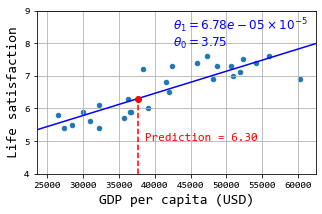

In [60]:
lifesat.plot(kind='scatter', figsize=(5, 3), grid=True, x=gdp, y=ls)
X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, w0 + w1 * X, 'b')

plt.text(max_gdp - 20_000, max_life_sat - 1.1, fr'$\theta_0 = {w0:.2f}$', color='b')
plt.text(max_gdp - 20_000, max_life_sat - 0.6, fr'$\theta_1 = {w1:.2e}\times 10^{{-5}}$', color='b')
plt.plot([cyprus_gdp, cyprus_gdp], [min_life_sat, cyprus_ls], 'r--')
plt.plot(cyprus_gdp, cyprus_ls, 'ro')

plt.text(cyprus_gdp + 1000, 5.0, fr"Prediction = {cyprus_ls:.2f}", color='r')

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()